In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from random import random
from copy import deepcopy
from prettytable import PrettyTable

# Energy of harmonic oscillator
def energy(q):
    return q**2/2


# Probability of the configuration
def prob(q):
    return math.e ** (-q**2/2)


# Compute the trial position q_old ± DELTA
def trial(q, delta):
    return q + random() * 2 * delta - delta

The function that runs the simulation
Trajectory away from the equilibrium position decay linearly to the equilibrio

In [ ]:
def run(q=4, steps=1000, delta = 0.1):
    p = prob(q)
    positions = []
    accepted = 0
    q_squared = 0

    for _ in range(steps):
        qtry = trial(q, delta)
        ptry = prob(qtry)
        alpha = ptry/p

        if alpha > random():
            q = qtry
            p = ptry
            accepted += 1

        positions.append(q)
        q_squared += q ** 2
    return (positions, round(accepted/steps,3), round(q_squared/steps, 3))

/var/folders/y8/lh75q07s5v3483_pb255smrw0000gn/T/ipykernel_31377/4150352828.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


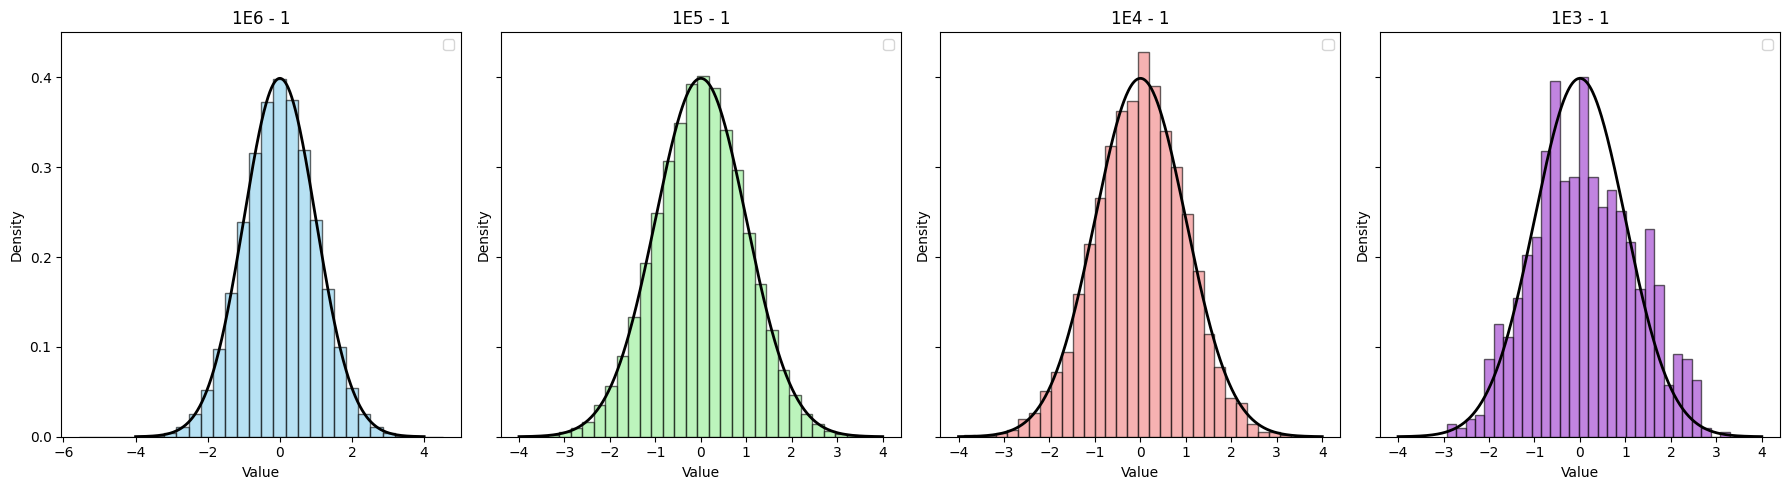

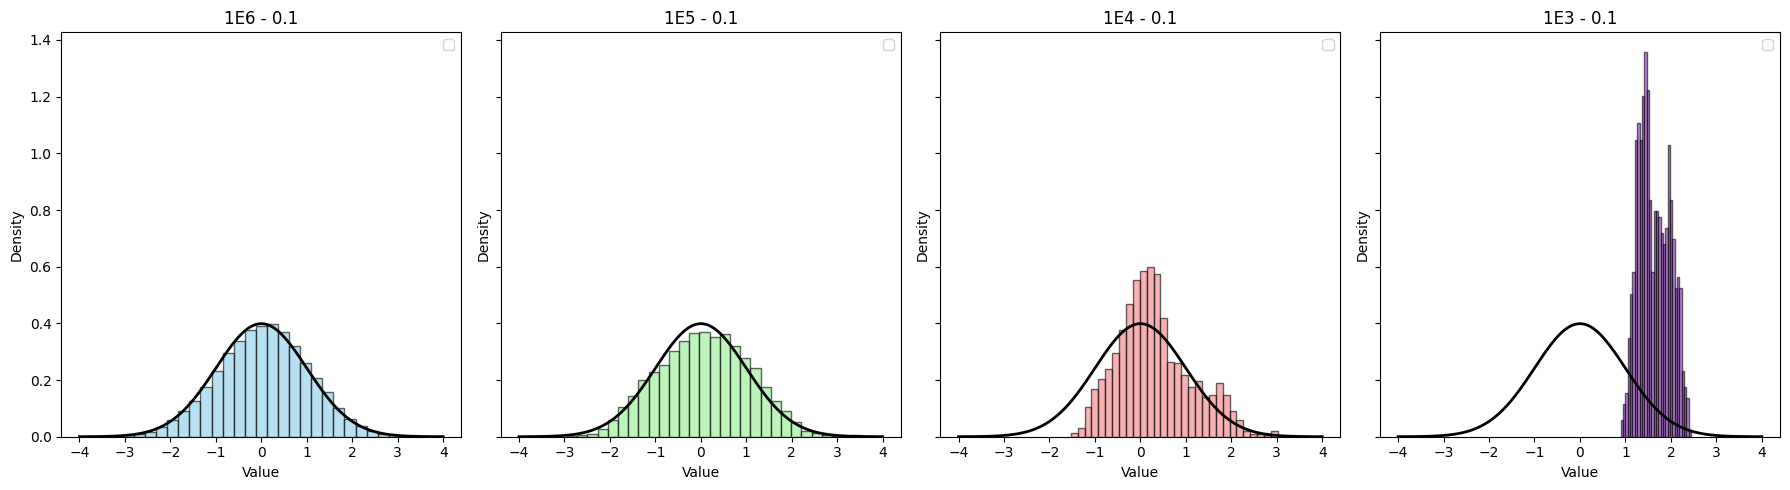

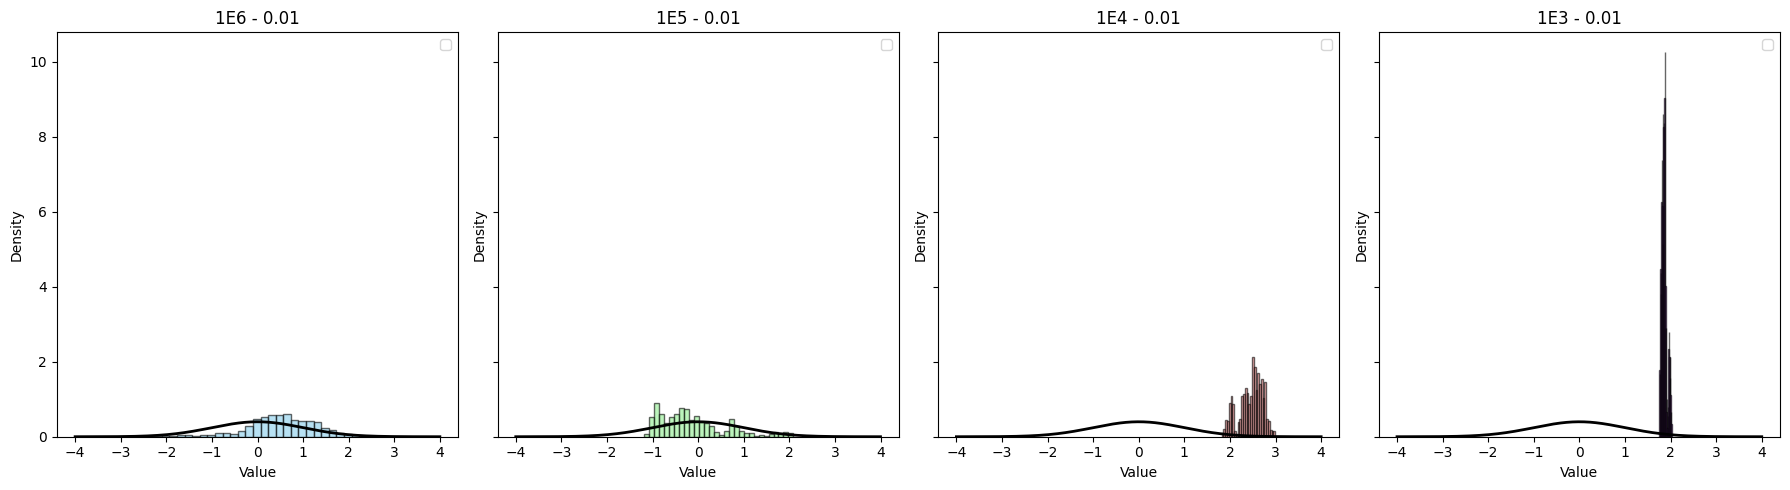

+---------+-------+------------+-------+--------------------+
| # Steps | Delta | Acceptance | <q^2> | Error on <q^2> (%) |
+---------+-------+------------+-------+--------------------+
| 1000000 | 1     | 0.804      | 1.0   | 0.0                |
| 100000  | 1     | 0.806      | 0.987 | 1.3                |
| 10000   | 1     | 0.799      | 0.971 | 2.9                |
| 1000    | 1     | 0.786      | 1.285 | 28.5               |
+---------+-------+------------+-------+--------------------+
| 1000000 | 0.1   | 0.98       | 0.981 | 1.9                |
| 100000  | 0.1   | 0.98       | 1.015 | 1.5                |
| 10000   | 0.1   | 0.983      | 0.752 | 24.8               |
| 1000    | 0.1   | 0.959      | 2.765 | 176.5              |
+---------+-------+------------+-------+--------------------+
| 1000000 | 0.01  | 0.998      | 0.84  | 16.0               |
| 100000  | 0.01  | 0.999      | 0.574 | 42.6               |
| 10000   | 0.01  | 0.994      | 6.08  | 508.0              |
| 1000  

In [27]:
steps = [1, 0.1, 0.01]
lengths = [1_000_000, 100_000, 10_000, 1_000]

table = PrettyTable()
table.align = 'l'
table.field_names = ["# Steps", "Delta", "Acceptance", "<q^2>", "Error on <q^2> (%)"]

for step in steps:
    positions_steps = []
    acceptances  = []
    q_squareds = []
    for i in range(0,len(lengths)):
       sim = run(2,lengths[i], step) 
       positions_steps.append(sim[0])
       acceptances.append(sim[1])
       q_squareds.append(sim[2]) 


    fig, axes = plt.subplots(1, len(lengths), figsize=(18, 5), sharey=True)
    datasets = [(positions_steps[0], f'1E6 - {step}'), (positions_steps[1], f'1E5 - {step}'), (positions_steps[2], f'1E4 - {step}'), (positions_steps[3], f'1E3 - {step}')]
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'darkorchid']

    for ax, (data, title), color in zip(axes, datasets, colors):
        # Plot histogram
        count, bins, _ = ax.hist(data, bins=30,density=True, color=color, alpha=0.6, edgecolor='black')
        
        # Plot Gaussian curve
        points = np.linspace(-4,4,500)
        ax.plot(points, prob(points) / math.sqrt(2*math.pi), 'k-', linewidth=2) 
        
        # Customize the plot
        ax.set_title(title)
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
    for i in range(0,len(lengths)):
        # Add rows to the table
        table.add_row([lengths[i], step, acceptances[i], q_squareds[i], round(abs(q_squareds[i] - 1) * 100, 3)], divider = (i == (len(lengths) - 1)))

print(table)

In [ ]:
# Block analysis
block_sizes = [1,2,5,10,20,50,100,200,500,1000,2000,5000]

for bs in block_sizes:
    number_of_blocks = len(traj) / bs
    if len(traj) * 2 >= bs:
        continue
    block_averages = np.average(traj.reshape((number_of_blocks, bs))**2, axis=1)
    np.std(block_averages)/(np.sqrt(number_of_blocks-1))

3D Coupled atoms
The wrong gaussian distribution doesnt account for state density. Number of states grows with the square of the distance in 3d

ACCEPTANCE:  0.893
AVG:  4.476


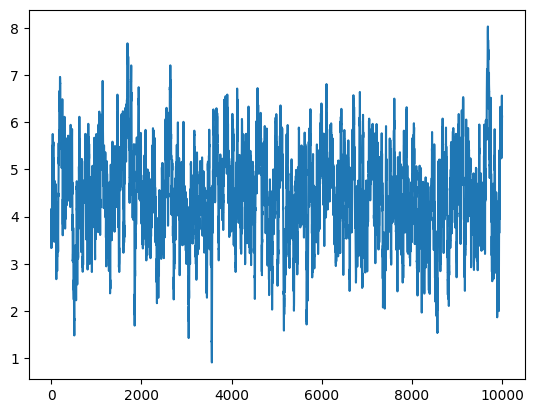

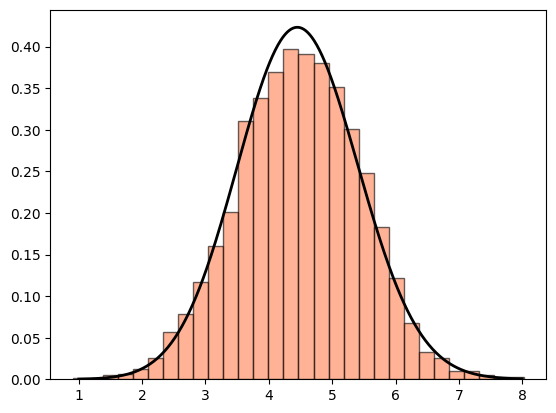

In [42]:
class Vec3(object):
    def __init__(self, x, y, z):
        self.vec = [x, y, z]

    def __repr__(self):
        return '{self.__class__.__name__}(x={self.vec[0]}, y={self.vec[1]}, z={self.vec[2]})'.format(self=self)

    def __add__(self, other):
        x1, y1, z1 = self.vec
        x2, y2, z2 = other.vec
        return Vec3(x1+x2, y1+y2, z1+z2)
    
    
    
    
    def __sub__(self, other):
        x1, y1, z1 = self.vec
        x2, y2, z2 = other.vec
        return Vec3(x1 - x2, y1 - y2, z1 - z2)

    def __getitem__(self, key):
        return self.vec[key]

    def __setitem__(self, key, value):
        self.vec[key] = value
    
    def norm(self):
       return math.sqrt(sum(x**2 for x in self.vec))

    def dot(self, other):
        x1, y1, z1 = self.vec
        x2, y2, z2 = other.vec
        return x1*x2 + y1*y2 + z1*z2


def prob(q1, q2):
    return math.exp(-0.5*((q1 - q2).norm() - 4)**2)

def run(qinit = [Vec3(-2,0,0), Vec3(2,0,0)], steps=10_000, delta = 1):
    distances = []
    p = prob(qinit[0], qinit[1]) 
    accepted = 0
    for i in range(steps):
        qtry = deepcopy(qinit)
        # Choose particle
        particle = int(random()*2)
        # Choose component
        direction = int(random()*3)
        qtry[particle][direction] += (random()*2*delta - delta)

        ptry = prob(qtry[0], qtry[1])

        alpha = ptry/p
        if alpha > 1 or alpha > random():
            qinit = qtry
            p = ptry
            accepted += 1
        distances.append((qinit[0] - qinit[1]).norm())
    print("ACCEPTANCE: ",   round(accepted / steps, 3))
    return distances 

data = run()
print("AVG: ", round(sum(data)/ len(data), 3))

plt.plot(np.arange(0,len(data)), data)
plt.show()
plt.hist(data, bins=30,density=True, color='coral', alpha=0.6, edgecolor='black')
points = np.linspace(1,8,500)
gaussians = []
for point in points:
    gaussians.append(point**2 * math.exp(-(point - 4)**2/2) / 106*math.sqrt(2*math.pi))
plt.plot(points, gaussians, 'k-', linewidth=2) 
plt.show()